#### K-means is not always a good option.

1. Choosing K is not always easy
2. It can only find spherical, convex clusters only


##### Links -
* [Video](https://youtu.be/5cOhL4B5waU "YouTube")
* [Notebook - DBSCAN](http://nbviewer.jupyter.org/github/papayawarrior/public_talks/blob/master/pydata_nyc_dbscan.ipynb "Open the damn link")
* [Notebook - DeBaCl](http://nbviewer.jupyter.org/github/papayawarrior/public_talks/blob/master/pydata_nyc_DeBaCl.ipynb "Nothing here")

# Density Based Clustering

** Assumption - Data is drawn from a PDF **
Find connected componensts - intersect data with the connected components, assigns points accordingly

** Pros **
* Recovers more complex cluster shapes
* Don't need to know k
* Automatically finds outliers

** Cons **
* Requires a distance function
* Not as scalable as K-means

## 1. DBSCAN
*Density-Based Spatial Clustering Applications with Noise*

** Main Idea **
* Three types of points (classify) : core, boundry, noise
* Core - connect core points to clusters
* Assign boundary points

#### Set up and generate data

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

plt.style.use('ggplot')
%matplotlib inline

In [40]:
label = make_moons(n_samples=200, noise=0.1, random_state=19)[1]
X = make_moons(n_samples=100, noise=0.1, random_state=19)[0]
print (X[:5,])

[[ 1.53007406 -0.15786408]
 [ 0.86956828 -0.47641119]
 [ 0.41521986  0.97604543]
 [ 0.31850869  0.96358885]
 [ 1.10556956  0.01200665]]


#### Train
*Parameters*
1. eps - Size of the neighbourhood around each point
2. min_samples - Number of samples needed to be around to be able to pick it (Density level threshold)

In [22]:
model = DBSCAN(eps=0.2, min_samples=6).fit(X)
print(model)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    min_samples=6, n_jobs=1, p=None)


In [5]:
model.labels_

array([ 0,  1,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  0,  1,  0,
        1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,
        0,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  1, -1,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,
        1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  1,  1,
        0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1,  0,  0,
        0,  1,  0,  1,  1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  0,  0,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        1,  1,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0], dtype=int64)

In [6]:
model.core_sample_indices_

array([  0,   1,   2,   7,   9,  10,  12,  13,  14,  18,  20,  21,  22,
        23,  24,  26,  28,  29,  31,  32,  33,  34,  35,  37,  38,  39,
        40,  41,  42,  44,  45,  46,  47,  49,  50,  51,  55,  56,  57,
        58,  59,  60,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        73,  75,  76,  77,  78,  79,  81,  83,  84,  86,  87,  88,  89,
        91,  92,  93,  94,  96,  98, 101, 102, 104, 105, 106, 107, 108,
       109, 110, 112, 113, 114, 115, 117, 118, 119, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 134, 136, 137, 138, 139, 140,
       142, 143, 144, 145, 147, 148, 149, 150, 154, 155, 157, 158, 159,
       160, 162, 163, 164, 165, 166, 170, 172, 173, 175, 177, 180, 182,
       183, 184, 187, 188, 189, 190, 191, 195, 197], dtype=int64)

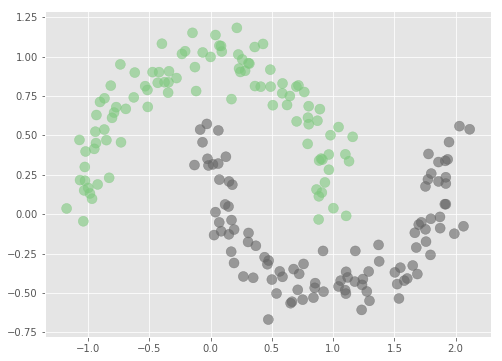

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X[:,0],X[:,1],c=model.labels_,alpha=0.6,cmap=plt.cm.Accent,s=100)

### DBSCAN in GraphLab Create

* Build on scalable *SFrame* and *Sgraph* data structures
* *Composite distances* for varied feature types
* Directly construct a similarity graph directly (now Scikit Learn is free to use)

Not free but free for non-commercial use. Refer to the Jupyter notebook from the links

## 2. Level Set Trees

#### In DBSCAN,
1. How do you choose the density level? (min_neighbours)
2. changing levels means starting from scratch

#### Level Set Trees (LSTs)
They describe the entire hierarchy
* Retrieve clusters in different ways without re-computing
* Each cluster can have a different density level
* Visualization of high-dim or complex data structure

### Building LSTs
1. Estimate PDF at each data point
2. Contruct a (k-NN) similarity graph on the data
    * Vertices are data points
    * Edges represent near neighbours
3. Remove vertices in order of estimated density
4. Compute the connected components at each level
    * Keep track of components between levels

In [36]:
import debacl as dcl

##### Parameters
1. k - connectivity. analogus to eps
2. Pruning threshold - If a leaf as more than n points, just merge it

Note - This module is not yet available with Python 3. I'll run the code whenever it is available

In [42]:
# Use it on the same make_moons data
# tree = dcl.construct_tree(X, k=10, prune_threshold=10)
# print (tree)

In [43]:
# fig = tree.plot(form='density')[0]

### Retrieving the clusters

In [44]:
# labels = tree.get_clusters(method='leaf', 
#                            fill_background=False)
# labels[:5]

In [45]:
# with plt.style.context(('ggplot')):
#     fig, ax = plt.subplots()
    
#     ax.scatter(X[labels[:,0], 0], X[labels[:,0], 1],
#                c=labels[:,1], s=140, alpha=0.9,
#                cmap=plt.cm.Set1)

In [46]:
# import numpy as np
# leaf_nodes = np.unique(labels[:, 1])

# plot = tree.plot(form='density', color_nodes=leaf_nodes,
#                  colormap='Set1')
# fig = plot[0]

### Identifying Outliers

In [47]:
# labels2 = tree.get_clusters(method='upper-level-set', threshold=0.05,
#                             form='mass')

# outliers = list(set(range(len(X))).difference(labels2[:, 0]))
# outliers

In [48]:
# with plt.style.context(('ggplot')):
#     fig, ax = plt.subplots()
    
#     ax.scatter(X[labels[:,0], 0], X[labels[:,0], 1], 
#                c=labels[:,1], s=140, alpha=0.9,
#                cmap=plt.cm.Set1)
    
#     ax.scatter(X[outliers, 0], X[outliers, 1], c='black', s=140,
#                alpha=0.9)